<a href="https://colab.research.google.com/github/AnnieMy28/initial_projects/blob/main/failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing as scale
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC

In [ ]:
dataset= pd.read_csv("/content/drive/MyDrive/predictive_maintenance_dataset.csv")
dataset.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
dataset.isnull().sum()
data = dataset.dropna(axis=0)
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [ ]:
dataset.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

In [ ]:
data.columns.shape
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
data.columns.shape
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [ ]:
data.sort_values(['device','date'],inplace=True)
data['Days'] = data.groupby('device')['date'].rank(method='dense')
data['date'] = pd.to_datetime(data['date'])
data.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,Days
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7,5.0
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,0,7,6.0
79790,2015-05-10,S1F013BB,0,85127128,0,0,0,5,689062,0,0,0,1.0
80194,2015-05-11,S1F013BB,0,115676688,0,0,0,5,689161,0,0,0,2.0
78172,2015-05-06,S1F013BB,0,14533968,0,0,0,5,688952,0,0,0,3.0
78576,2015-05-07,S1F013BB,0,46202296,0,0,0,5,688952,0,0,0,4.0


In [ ]:
data.columns.shape
data['failure'].value_counts()
data.groupby(['metric7','metric8'])['metric7'].count()

metric7  metric8
0        0          123036
6        6              13
8        8             793
16       16            397
22       22              2
24       24             65
32       32             35
40       40             20
48       48             36
56       56              6
72       72             11
80       80              4
96       96              7
104      104             3
112      112             2
128      128            23
136      136             1
152      152             2
176      176            20
216      216             1
240      240             1
272      272             2
312      312             5
424      424             1
496      496             1
736      736             4
744      744             1
832      832             2
Name: metric7, dtype: int64

Text(0.5, 0, 'Age(No. of days since installation)')

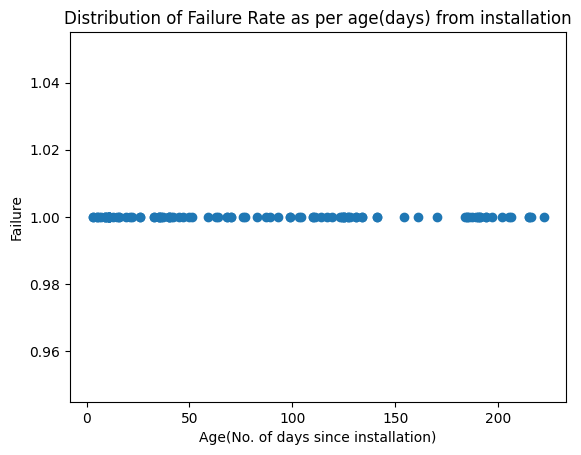

In [ ]:
#Failure rate Vs days from installation
Failure = data[data.failure==1]

#Failure.Days.value_counts().plot(kind='barh')
plt.plot(Failure.Days,Failure.failure,'o')
plt.title("Distribution of Failure Rate as per age(days) from installation")
plt.ylabel("Failure")
plt.xlabel("Age(No. of days since installation)")
#highly unlikely that age has any relation with failure rate

<ipython-input-12-72abde31cb83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = data[data.columns].corr()


<Axes: >

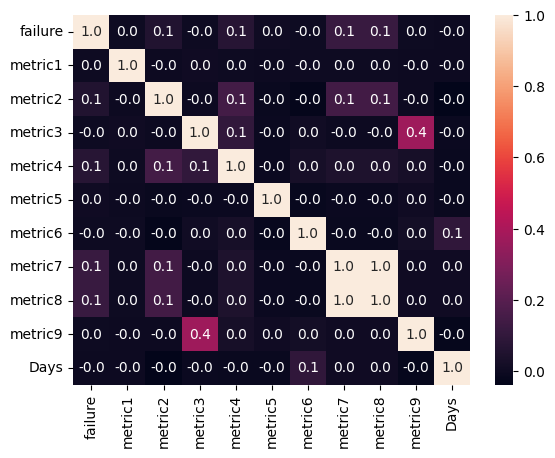

In [ ]:
Corr = data[data.columns].corr()
sns.heatmap(Corr,annot=True,fmt=".1f")
#attrute 9 and 3 seem to have a good co-relation though not high enough

Text(0, 0.5, 'Y (Metric3)')

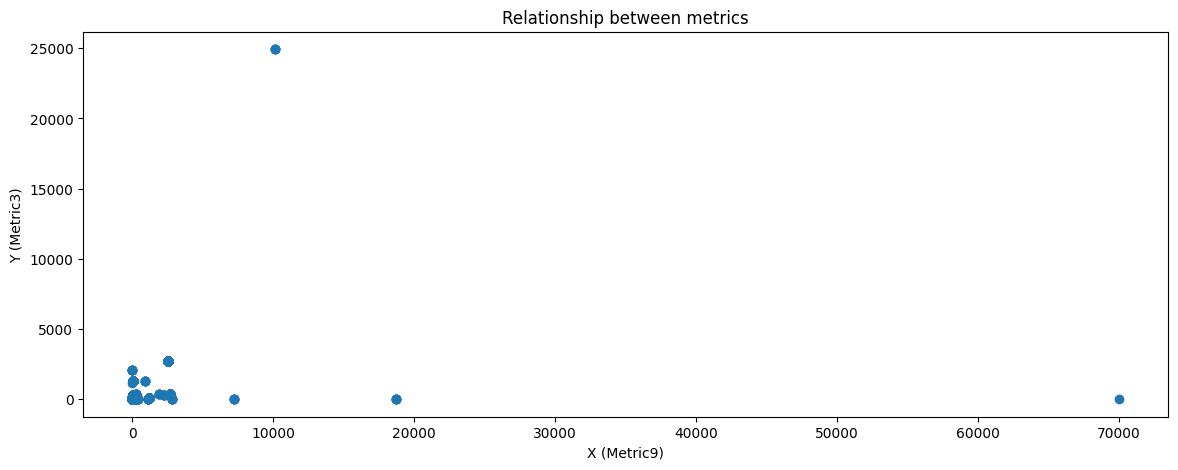

In [ ]:
fig = plt.figure(figsize = (14,5))
plt.plot(data.metric9,data.metric3,'o')
plt.title("Relationship between metrics")
plt.xlabel('X (Metric9)')
plt.ylabel('Y (Metric3)')

Text(0, 0.5, 'Metric9')

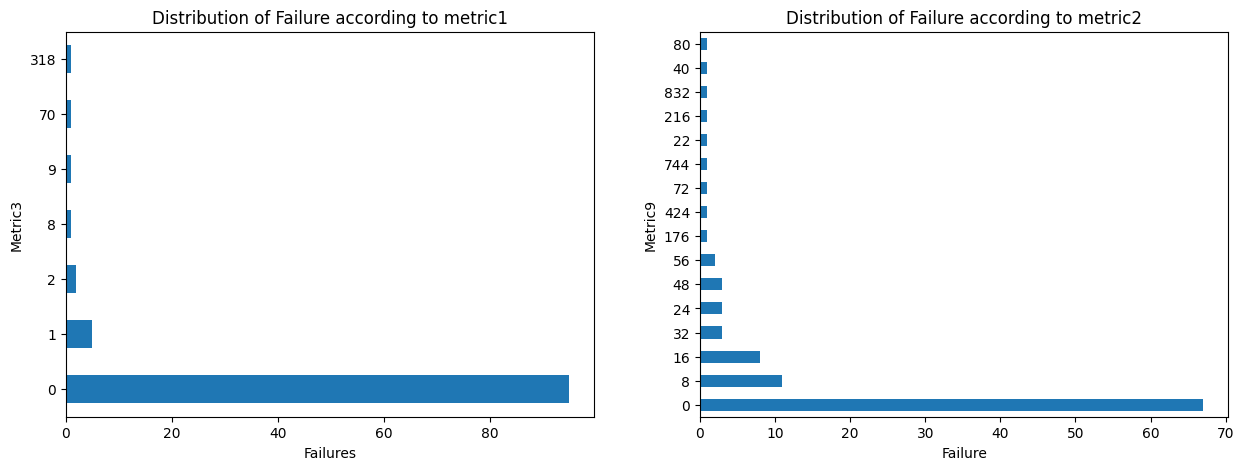

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((1,2),(0,0))
#Failure vs Attribute1
Failure.metric3.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to metric1")
plt.xlabel("Failures")
plt.ylabel("Metric3")

plt.subplot2grid((1,2),(0,1))
Failure.metric7.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to metric2")
plt.xlabel("Failure")
plt.ylabel("Metric9")

Text(0, 0.5, 'Attribute3')

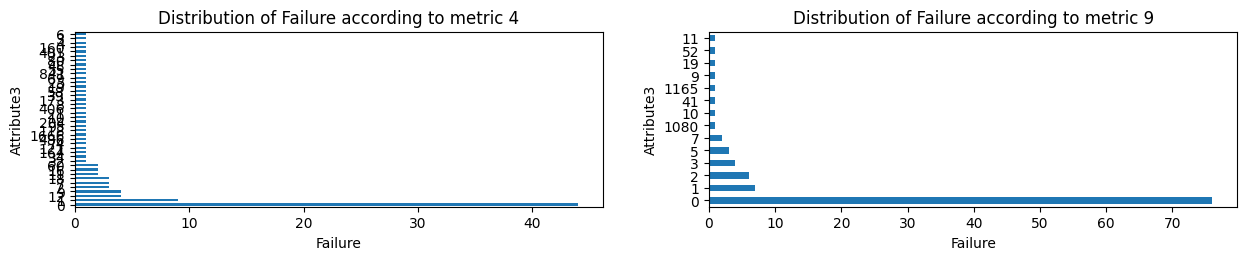

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((2,2),(0,0))
Failure.metric4.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to metric 4")
plt.xlabel("Failure")
plt.ylabel("Attribute3")

plt.subplot2grid((2,2),(0,1))
Failure.metric9.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to metric 9")
plt.xlabel("Failure")
plt.ylabel("Attribute3")

In [ ]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,Days
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848,103.178209
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220,77.211251
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,38.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,83.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,162.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000,304.000000


In [ ]:
data.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
Days       0
dtype: int64

In [ ]:

df_nonfailure = data[data['failure'] == 0]
df_failure = data[data['failure']==1]
df_nonfailure_downsample = resample(df_nonfailure,replace=False,n_samples = 106,\
                                    random_state=23)
df_resampled = pd.concat([df_nonfailure_downsample,df_failure])

data_Outcome = df_resampled['failure']
#scaling cat and cont data

#dropping unwanted columns
df_resampled = df_resampled.drop(['failure','date','device','metric8'],axis = 1)
standard_sc = scale.StandardScaler()
x_std = standard_sc.fit_transform(df_resampled)
data_scaled = pd.DataFrame(x_std)

In [ ]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.418413,-0.224457,-0.156009,-0.138593,-0.426596,-0.690098,-0.184945,-0.109962,-1.255823
1,-1.672101,-0.224457,-0.156009,-0.160191,-0.545282,-0.600106,-0.184945,-0.119140,-1.022741
2,0.582654,-0.224457,-0.156009,-0.203389,-0.545282,-2.322278,-0.184945,-0.119140,-0.405759
3,1.274988,-0.224457,-0.156009,-0.203389,-0.426596,-0.298966,-0.184945,-0.119140,0.581411
4,-0.064419,-0.224457,-0.156009,-0.203389,-0.129882,0.066313,-0.184945,-0.119140,-1.050162


In [ ]:
#split data into test and train
xtrain,xtest,ytrain,ytest = train_test_split(data_scaled,data_Outcome, \
                                             test_size=0.25,random_state =19)

In [ ]:
#defining a metrics function to evaluate a model
def Metrics(ytest,pred):
    print('accuray:', accuracy_score(ytest,pred),',recall score:',recall_score(ytest,pred),'\n ConfusionMatrix: \n',confusion_matrix(ytest,pred))
    #model_rf.feature_importances_
    average_precision = average_precision_score(ytest,pred)
    print('average_precision_score: ',average_precision_score(ytest,pred))
    print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))

    precision, recall,_ = precision_recall_curve(ytest,pred)
    plt.step(recall,precision, color='b',alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,\
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(\
              average_precision))
    #plt.title(algo)

In [ ]:
#decision tree classifier
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
Metrics (ytest,pred_dt)
print('******decision tree*****')
print('accuray:', accuracy_score(ytest,pred_dt),',recall score:',recall_score(ytest,pred_dt))
print(confusion_matrix(ytest,pred_dt))
print(model_dt.feature_importances_ )

accuray: 0.8301886792452831 ,recall score: 0.8275862068965517 
 ConfusionMatrix: 
 [[20  4]
 [ 5 24]]
average_precision_score:  0.8036992285528394


NameError: name 'pred_rf' is not defined

In [ ]:
gnb = GaussianNB()
modelgnb = gnb.fit(xtrain,ytrain)
pred_gnb = modelgnb.predict(xtest)
Metrics(ytest,pred_gnb)

accuray: 0.7735849056603774 ,recall score: 0.5862068965517241 
 ConfusionMatrix: 
 [[24  0]
 [12 17]]
average_precision_score:  0.8126219908913468


NameError: name 'pred_rf' is not defined

In [ ]:
modelsvc = SVC(kernel='linear')
modelsvc.fit(xtrain,ytrain)
pred_svm = modelsvc.predict(xtest)
Metrics(ytest,pred_svm)

accuray: 0.660377358490566 ,recall score: 0.3793103448275862 
 ConfusionMatrix: 
 [[24  0]
 [18 11]]
average_precision_score:  0.7189329863370202


NameError: name 'pred_rf' is not defined

In [ ]:
def model_comparison(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    gnb = GaussianNB()
    svc = LinearSVC(C=1.0)
    rfc = RandomForestClassifier(n_estimators=100)

    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),\
                      (gnb, 'Naive Bayes'),\
                      (svc, 'Support Vector Classification'),\
                      (rfc, 'Random Forest')]:
        clf.fit(X_train, y_train)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


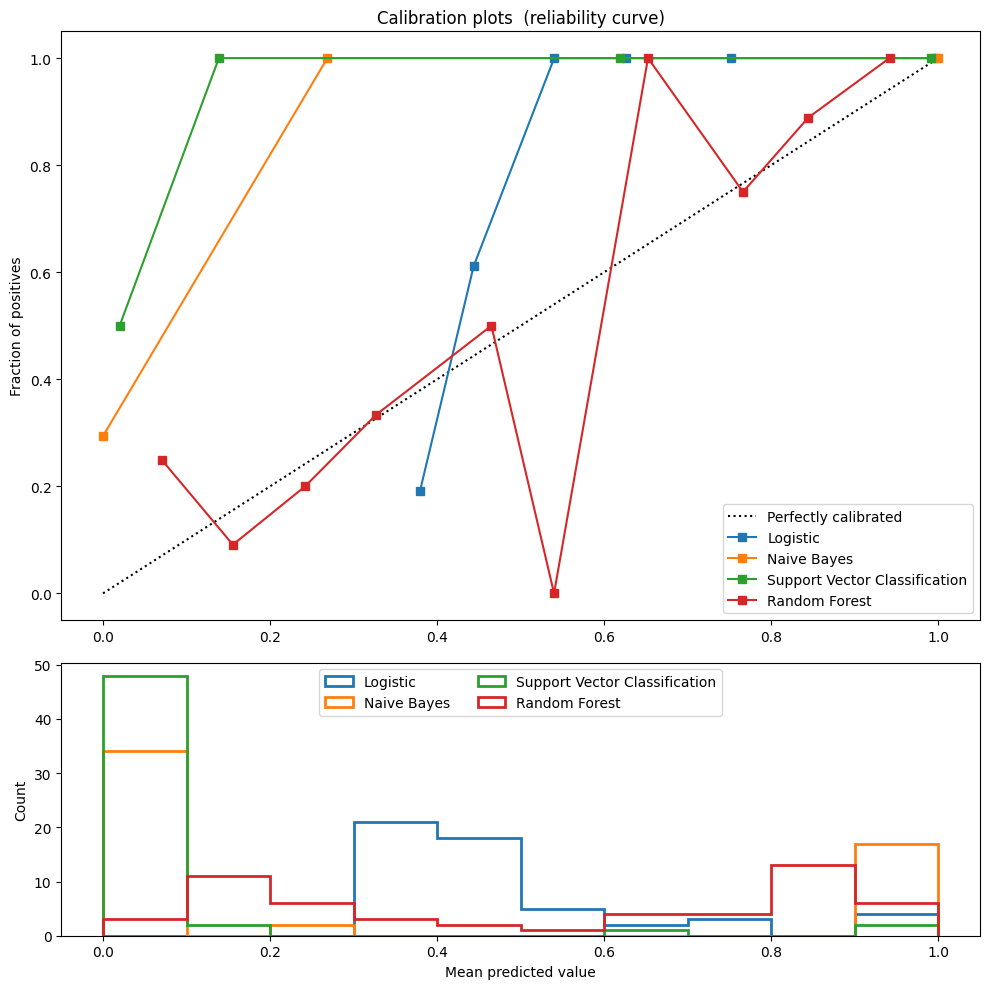

In [ ]:
model_comparison(xtrain,xtest,ytrain,ytest)